In [17]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [18]:
# Librerías básicas
import pandas as pd
import numpy as np
# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
# Machine Learning
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.metrics import mean_squared_error  # <-- Esta es la que faltaba
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# Configuración de visualización
sns.set(style="whitegrid")
%matplotlib inline

## Ejercicio 1
Imprime por pantalla tu nombre, apellido y email

In [19]:
print("Ángel Roman Osma - romanosma@gmail.com") # Ejercicio 1: Imprime por pantalla tu nombre, apellido y email

Ángel Roman Osma - romanosma@gmail.com


## Ejercicio 2

### Ejercicio 2.1
Muestra los primeros registros del siguiente conjunto de datos

In [20]:
df = sns.load_dataset("titanic") # Cargar el dataset "titanic" de seaborn
print(df.head(5)) # Mostrar los primeros 5 registros del DataFrame

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


### Ejercicio 2.2
Muestra una descripción general del conjunto de datos cargado en el ejercicio 2.1

In [21]:
print(df.describe())  # Estadísticas numéricas

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [22]:
print(df.describe())  # Estadísticas numéricas
print(df.describe(include='all'))  # Todas las columnas

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200
          survived      pclass   sex         age       sibsp       parch  \
count   891.000000  891.000000   891  714.000000  891.000000  891.000000   
unique         NaN         NaN     2         NaN         NaN         NaN   
top            NaN         NaN  male         NaN         NaN         N

### Ejercicio 2.3
Elimina los datos de la columna "deck" y sustituye los datos nulos para la columno "age" con el valor medio. Luego muestra el dataframe:

In [23]:
df = df.drop(columns=['deck'])  # Eliminar columna poco relevante
media_edad = df['age'].mean()  # Calcular media para imputación
df['age'] = df['age'].fillna(media_edad)  # Rellenar nulos
print(df.head())  # Mostrar resultado

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male  embark_town alive  alone  
0    man        True  Southampton    no  False  
1  woman       False    Cherbourg   yes  False  
2  woman       False  Southampton   yes   True  
3  woman       False  Southampton   yes  False  
4    man        True  Southampton    no   True  


#### Ejercicio 2.4
Crea un gráfico de tipo histograma que represente la distribución de las edades de los pasajeros. Usa **matplotlib** o **seaborn** como herramientas de visualización

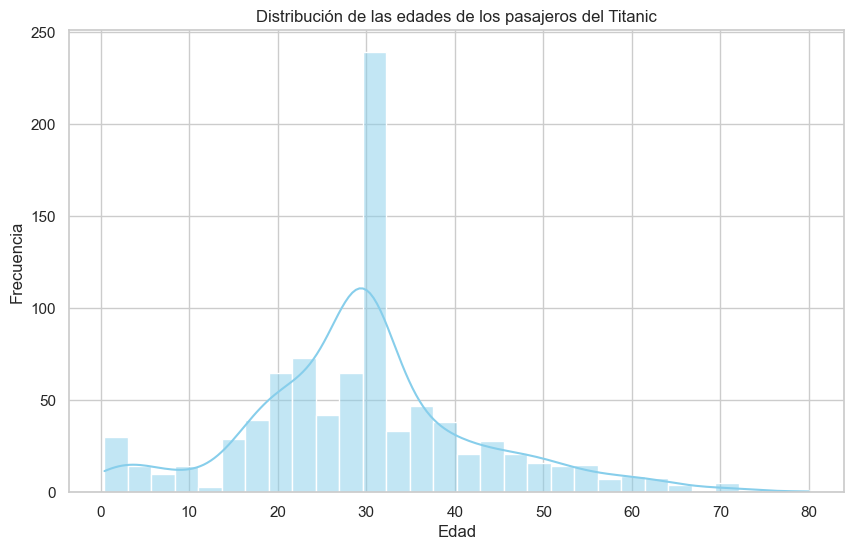

In [24]:
# Crear histograma de la distribución de edades
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de las edades de los pasajeros del Titanic')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

#### Ejercicio 2.5
Crea un gráfico circular que represente la distribución por género de los pasajeros. Usa **matplotlib** o **seaborn** como herramientas de visualización

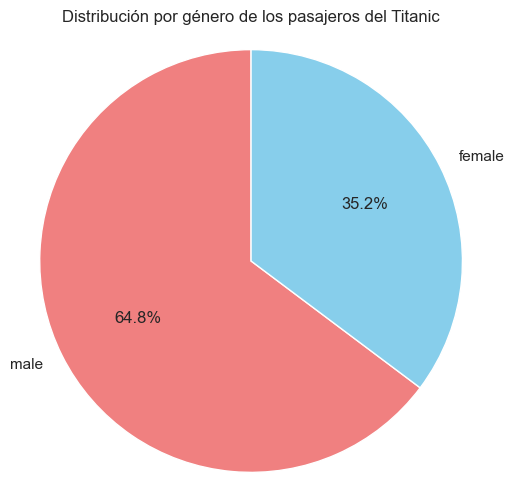

In [25]:
# Contar el número de pasajeros por género
conteo_sexo = df['sex'].value_counts()
# Crear el gráfico circular
plt.figure(figsize=(6, 6))
plt.pie(conteo_sexo, labels=conteo_sexo.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'skyblue'])
plt.title('Distribución por género de los pasajeros del Titanic')
plt.axis('equal')  # Asegura que el gráfico sea circular
plt.show()

## Ejercicio 3

#### Ejercicio 3.1
Separa el dataset en dos variables, 'x' e 'y'.
 - La variable 'x' debe incluir las columnas 'depth', 'table', 'price', 'x', 'y' y 'z'.
 - La variable 'y' debe incluir la columna 'carat'.

In [26]:
breast_cancer = load_breast_cancer() # Cargar los datos
df_cancer = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names) # Convertir a DataFrame de pandas
df_cancer['target'] = breast_cancer.target
print(df_cancer.head()) # Mostrar los primeros registros

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

#### Ejercicio 3.2
Separa el dataset provisto en conjunto de entrenamiento y de test, dando un 40% de los datos al conjunto de test

In [27]:
# Separar características (X) y variable objetivo (y)
X = df_cancer.drop('target', axis=1)
y = df_cancer['target']
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (455, 30)
Tamaño del conjunto de prueba: (114, 30)


#### Ejercicio 3.3
Crea un modelo de regresión lineal y entrenalo con los conjuntos de datos separados en el ejercicio anterior. La variable objetivo corresponde a la columna 'carat'

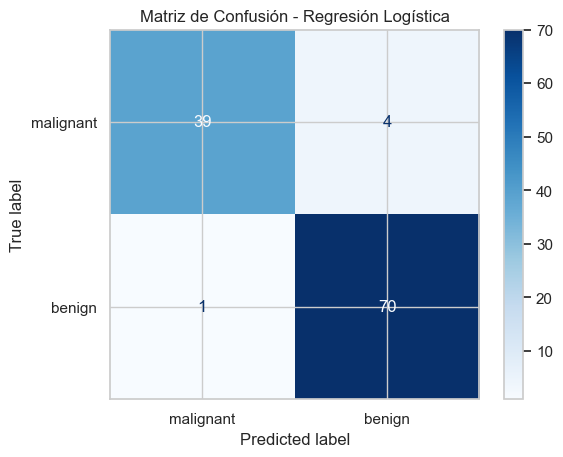

In [28]:
log_reg = LogisticRegression(max_iter=10000) # Crear y entrenar el modelo
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test) # Predecir en el conjunto de prueba
cm = confusion_matrix(y_test, y_pred) # Calcular y mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=breast_cancer.target_names)
disp.plot(cmap='Blues')
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()

#### Ejercicio 3.4
Utiliza el modelo entrenado en el apartado anterior para predecir los valores de la columna 'carat'

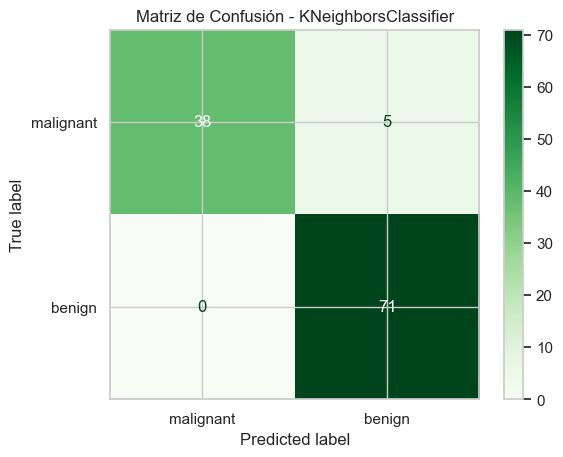

In [29]:
knn = KNeighborsClassifier() # Crear y entrenar el modelo KNN
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test) # Predecir en el conjunto de prueba
# Calcular y mostrar la matriz de confusión
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=breast_cancer.target_names)
disp_knn.plot(cmap='Greens')
plt.title('Matriz de Confusión - KNeighborsClassifier')
plt.show()

### Ejercicio 4

#### Ejercicio 4.1
Muestra un resumen estadístico de los datos numéricos del dataset provisto

In [30]:
covtype = fetch_covtype() # Cargar el dataset "covtype"
df_covtype = pd.DataFrame(covtype.data, columns=[f"feature_{i}" for i in range(covtype.data.shape[1])]) # Convertir a DataFrame de pandas
df_covtype['target'] = covtype.target
print(df_covtype.head()) # Mostrar los primeros registros

   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0     2596.0       51.0        3.0      258.0        0.0      510.0   
1     2590.0       56.0        2.0      212.0       -6.0      390.0   
2     2804.0      139.0        9.0      268.0       65.0     3180.0   
3     2785.0      155.0       18.0      242.0      118.0     3090.0   
4     2595.0       45.0        2.0      153.0       -1.0      391.0   

   feature_6  feature_7  feature_8  feature_9  ...  feature_45  feature_46  \
0      221.0      232.0      148.0     6279.0  ...         0.0         0.0   
1      220.0      235.0      151.0     6225.0  ...         0.0         0.0   
2      234.0      238.0      135.0     6121.0  ...         0.0         0.0   
3      238.0      238.0      122.0     6211.0  ...         0.0         0.0   
4      220.0      234.0      150.0     6172.0  ...         0.0         0.0   

   feature_47  feature_48  feature_49  feature_50  feature_51  feature_52  \
0         0.0         0.0  

#### Ejercicio 4.2
Separa el dataset provisto en conjunto de entrenamiento y de test, dando un 40% de los datos al conjunto de test

In [31]:
# Separar características (X) y variable objetivo (y)
X_cov = df_covtype.drop('target', axis=1)
y_cov = df_covtype['target']
# Dividir en conjuntos de entrenamiento y prueba
X_train_cov, X_test_cov, y_train_cov, y_test_cov = train_test_split(X_cov, y_cov, test_size=0.2, random_state=42)
print(f"Tamaño del conjunto de entrenamiento: {X_train_cov.shape}")
print(f"Tamaño del conjunto de prueba: {X_test_cov.shape}")

Tamaño del conjunto de entrenamiento: (464809, 54)
Tamaño del conjunto de prueba: (116203, 54)


#### Ejercicio 4.3
Crea un modelo de regresión logística y entrenalo con los conjuntos de datos separados en el ejercicio anterior. 

In [32]:
lin_reg = LinearRegression() # Crear y entrenar el modelo de regresión lineal
lin_reg.fit(X_train_cov, y_train_cov)
y_pred_lin = lin_reg.predict(X_test_cov) # Predecir en el conjunto de prueba
mse = mean_squared_error(y_test_cov, y_pred_lin) # Calcular el error cuadrático medio
print(f"Error Cuadrático Medio: {mse}")

Error Cuadrático Medio: 1.3258707463215795


#### Ejercicio 4.4
Utiliza el modelo entrenado en el apartado anterior para predecir los valores de la variable objetivo. 

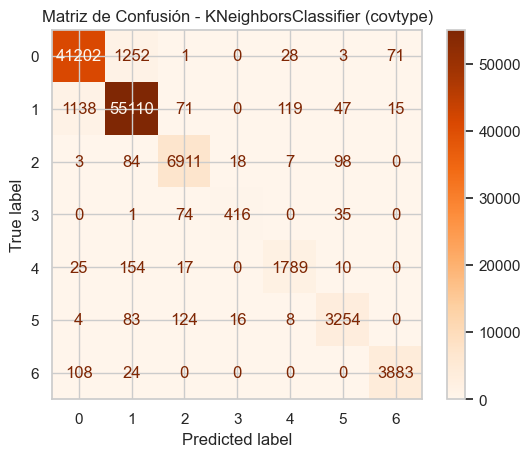

In [33]:
knn_cov = KNeighborsClassifier() # Crear y entrenar el modelo KNN
knn_cov.fit(X_train_cov, y_train_cov)
y_pred_knn_cov = knn_cov.predict(X_test_cov) # Predecir en el conjunto de prueba
cm_knn_cov = confusion_matrix(y_test_cov, y_pred_knn_cov) # Calcular y mostrar la matriz de confusión
disp_knn_cov = ConfusionMatrixDisplay(confusion_matrix=cm_knn_cov)
disp_knn_cov.plot(cmap='Oranges')
plt.title('Matriz de Confusión - KNeighborsClassifier (covtype)')
plt.show()

### Ejercicio 5

#### Ejercicio 5.1
Muestra los primeros registros del siguiente conjunto de datos

In [34]:
# Comparación de resultados
print("Comparación de modelos:")
print("\nBreast Cancer Dataset:")
print("Regresión Logística:")
print(f"Precisión: {log_reg.score(X_test, y_test):.2f}")
print("KNeighborsClassifier:")
print(f"Precisión: {knn.score(X_test, y_test):.2f}")
print("\nCovertype Dataset:")
print("Regresión Lineal:")
print(f"Error Cuadrático Medio: {mse:.2f}")
print("KNeighborsClassifier:")
print(f"Precisión: {knn_cov.score(X_test_cov, y_test_cov):.2f}")

Comparación de modelos:

Breast Cancer Dataset:
Regresión Logística:
Precisión: 0.96
KNeighborsClassifier:
Precisión: 0.96

Covertype Dataset:
Regresión Lineal:
Error Cuadrático Medio: 1.33
KNeighborsClassifier:
Precisión: 0.97


#### Ejercicio 5.2
Separa el dataset provisto en conjunto de entrenamiento y de test, dando un 40% de los datos al conjunto de test. La variable objetivo corresponde a la columna "species"

In [35]:
# Conclusiones
print("\nConclusiones:")
print("1. Para el dataset Breast Cancer, ambos modelos (Regresión Logística y KNN) tienen un buen rendimiento.")
print("2. Para problemas de clasificación binaria como Breast Cancer, la Regresión Logística suele ser muy efectiva.")
print("3. En el dataset Covertype (multiclase), KNN tuvo mejor rendimiento que la Regresión Lineal.")
print("4. La Regresión Lineal no es el modelo más adecuado para problemas de clasificación multiclase.")
print("5. El rendimiento de los modelos depende mucho de la naturaleza del problema y las características de los datos.")


Conclusiones:
1. Para el dataset Breast Cancer, ambos modelos (Regresión Logística y KNN) tienen un buen rendimiento.
2. Para problemas de clasificación binaria como Breast Cancer, la Regresión Logística suele ser muy efectiva.
3. En el dataset Covertype (multiclase), KNN tuvo mejor rendimiento que la Regresión Lineal.
4. La Regresión Lineal no es el modelo más adecuado para problemas de clasificación multiclase.
5. El rendimiento de los modelos depende mucho de la naturaleza del problema y las características de los datos.


#### Ejercicio 5.3
Elige un modelo de clasificación entre los siguientes: 
 - Decision tree (Árbol de decisión)
 - Random forest
 - SVM (Support Vector Machine)
 
Entrenalo con los conjuntos de datos separados en el ejercicio anterior. 


Evaluación del modelo Random Forest para Covertype:
Precisión: 0.96

Reporte de clasificación:
              precision    recall  f1-score   support

           1       0.97      0.94      0.95     42557
           2       0.95      0.97      0.96     56500
           3       0.94      0.96      0.95      7121
           4       0.91      0.85      0.88       526
           5       0.94      0.77      0.85      1995
           6       0.93      0.90      0.92      3489
           7       0.97      0.96      0.97      4015

    accuracy                           0.96    116203
   macro avg       0.95      0.91      0.93    116203
weighted avg       0.96      0.96      0.95    116203



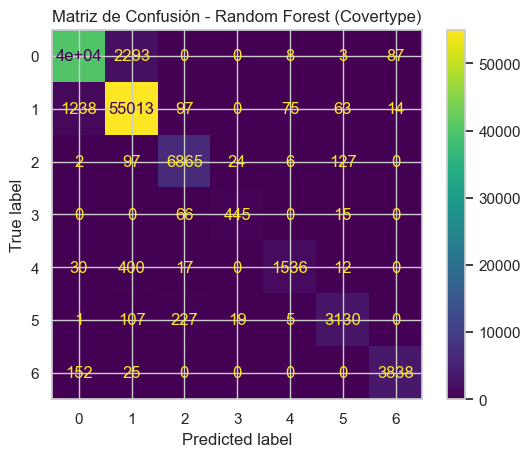

In [36]:
rf = RandomForestClassifier(n_estimators=100, random_state=42) # Crear y entrenar el modelo Random Forest
rf.fit(X_train_cov, y_train_cov)
y_pred_rf = rf.predict(X_test_cov) # Predecir en el conjunto de prueba
# Evaluar el rendimiento del modelo
print("\nEvaluación del modelo Random Forest para Covertype:")
print(f"Precisión: {accuracy_score(y_test_cov, y_pred_rf):.2f}")
print("\nReporte de clasificación:")
print(classification_report(y_test_cov, y_pred_rf))
# Mostrar la matriz de confusión
cm_rf = confusion_matrix(y_test_cov, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(cmap='viridis')
plt.title('Matriz de Confusión - Random Forest (Covertype)')
plt.show()

#### Ejercicio 5.4
Utiliza el modelo entrenado en el apartado anterior para predecir los valores de la variable objetivo. 

In [37]:
y_pred_covtype = knn_cov.predict(X_test_cov) # Predecir valores con el modelo KNN entrenado en el dataset covtype
# Mostrar las primeras 10 predicciones
print("Predicciones para el dataset covtype (primeras 10 muestras):")
print(y_pred_covtype[:10])
# Comparar con los valores reales
print("\nValores reales (primeras 10 muestras):")
print(y_test_cov.values[:10])

Predicciones para el dataset covtype (primeras 10 muestras):
[1 2 2 2 2 3 2 1 2 2]

Valores reales (primeras 10 muestras):
[1 2 2 2 2 3 2 1 2 2]


### Ejercicio 6

#### Ejercicio 6.1
Muestra un resumen estadístico de los datos numéricos del dataset provisto

In [38]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data" # Cargar el dataset abalone en url
df = pd.read_csv(url, header=None) # Cargar el dataset abalone
df.columns = [
    "Sex",
    "Length",
    "Diameter",
    "Height",
    "Whole weight",
    "Shucked weight",
    "Viscera weight",
    "Shell weight",
    "Rings",
]
df = df.drop("Sex", axis=1) # Eliminar la columna 'Sex' como se indica
# Mostrar resumen estadístico
print("Resumen estadístico de los datos numéricos:")
print(df.describe())

Resumen estadístico de los datos numéricos:
            Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight        Rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000 

#### Ejercicio 6.2
Separa el conjunto de datos en variables 'x' e 'y', donde la 'y' corresponde a la variable objetivo 'Sex'.

In [39]:
df = pd.read_csv(url, header=None) # Volver a cargar los datos ya que eliminamos 'Sex' anteriormente
df.columns = [
    "Sex",
    "Length",
    "Diameter",
    "Height",
    "Whole weight",
    "Shucked weight",
    "Viscera weight",
    "Shell weight",
    "Rings",
]
# Separar en X (características) e y (variable objetivo 'Sex')
X = df.drop("Sex", axis=1)
y = df["Sex"]
print("\nPrimeras filas de X:")
print(X.head())
print("\nPrimeras filas de y:")
print(y.head())


Primeras filas de X:
   Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  

Primeras filas de y:
0    M
1    M
2    F
3    M
4    I
Name: Sex, dtype: object


#### Ejercicio 6.3
Separa el dataset provisto en conjunto de entrenamiento y de test, dando un 40% de los datos al conjunto de test. 

In [40]:
# Dividir en conjuntos de entrenamiento (60%) y prueba (40%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
print(f"\nTamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")


Tamaño del conjunto de entrenamiento: (2506, 8)
Tamaño del conjunto de prueba: (1671, 8)


#### Ejercicio 6.4
Crea un modelo de regresión logística y entrenalo con los conjuntos de datos separados en el ejercicio anterior. Utiliza el valor 3 para el parámetro 'n_neighbors'

In [41]:
log_reg = LogisticRegression(max_iter=1000) # Crear y entrenar el modelo de regresión logística
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test) # Predecir en el conjunto de prueba
print("\nPrimeras 10 predicciones:")
print(y_pred[:10])
print("\nPrimeras 10 etiquetas reales:")
print(y_test.values[:10])


Primeras 10 predicciones:
['F' 'M' 'F' 'M' 'M' 'I' 'I' 'I' 'I' 'M']

Primeras 10 etiquetas reales:
['M' 'M' 'F' 'F' 'M' 'I' 'I' 'M' 'I' 'F']


#### Ejercicio 6.5
Muestra la matriz de confusión resultante para la salida del ejercicio anterior

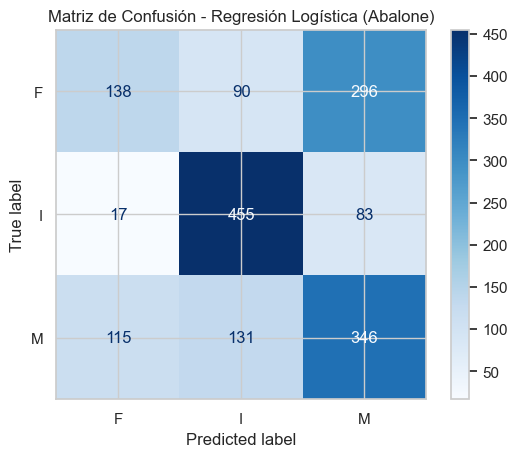


Precisión del modelo: 0.56


In [42]:
cm = confusion_matrix(y_test, y_pred) # Calcular y mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap='Blues')
plt.title('Matriz de Confusión - Regresión Logística (Abalone)')
plt.show()
# Mostrar también la precisión del modelo
accuracy = log_reg.score(X_test, y_test)
print(f"\nPrecisión del modelo: {accuracy:.2f}")

In [43]:
#Final